<h2 align="center">NLP :Text Classification USing countvectorization,tf-idf and Gensim Word Embeddings</h2>

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- We will use **glove embeddings** from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.


## Text Classification Project

### Introduction

This Jupyter Notebook documents a comprehensive text classification project. The goal of the project is to develop and evaluate machine learning models capable of distinguishing between fake and real news articles. The dataset used for this task is sourced from the "fake_or_real_news" dataset, comprising textual information and corresponding labels indicating the authenticity of each news article.

The project encompasses various stages, including data loading, text preprocessing, feature engineering through vectorization techniques, model training, evaluation, and hyperparameter tuning. Both traditional machine learning approaches, such as Multinomial Naive Bayes and Gradient Boosting, and advanced techniques like word embeddings, are explored and compared.

### Project Workflow

1. **Loading the Dataset:**
   - The dataset is loaded using Pandas to gain an understanding of its structure.

2. **Text Preprocessing:**
   - Textual data is preprocessed to enhance the quality of features for model training. Techniques include lowercase conversion, removal of special characters and stop words, tokenization, and optional stemming.

3. **Label Encoding:**
   - Labels indicating "FAKE" or "REAL" are encoded numerically to facilitate model training.

4. **Vectorization:**
   - The textual data is converted into numerical vectors using CountVectorizer, TfidfVectorizer, and word embeddings (Word2Vec and Spacy).

5. **Model Training and Evaluation:**
   - Models, including Multinomial Naive Bayes and Gradient Boosting, are trained and evaluated using different vectorization techniques.

6. **Word Embeddings with Gensim and Spacy:**
   - Pre-trained word embeddings models are used to create numerical representations for words.

7. **Word Embedding-Based Model (Gradient Boosting):**
   - A Gradient Boosting model is trained using vectors obtained from word embeddings.

8. **Hyperparameter Tuning (Grid Search):**
   - Hyperparameter tuning is performed using Grid Search to optimize model performance.

9. **Analysis and Comparison:**
   - Results are analyzed and compared, considering accuracy, precision, recall, and F1-score.

10. **Conclusion:**
    - Key findings and model performances are summarized, and recommendations for further improvement are provided.

11. **Additional Recommendations:**
    - Suggestions for future enhancements, such as incorporating more data and exploring deep learning approaches, are outlined.

The following sections detail each step of the project and present the outcomes and analyses.




## Data Exploration and Overview

The dataset is collected from 'https://www.kaggle.com/datasets/hassanamin/textdb3/code'. 

- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**
The dataset "fake_or_real_news.csv" is loaded into a Pandas DataFrame named 'df'. The DataFrame contains 6335 entries and consists of four columns:

1. **Unnamed: 0:** An integer column serving as an index.
2. **title:** The title of the news article.
3. **text:** The content or body of the news article.
4. **label:** The label indicating whether the news is classified as "FAKE" or "REAL".



In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [40]:
## Fake News Classifier
import pandas as pd

In [41]:
df=pd.read_csv('fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


The dataset has no missing values, and the data types for each column are appropriate.


## Data Preprocessing
### Text Preprocessing Function

A text preprocessing function, named `preprocess_text`, has been defined. This function applies several common text preprocessing steps to clean and prepare the text data for classification. The steps include:

1. **Convert to lowercase:** All text is converted to lowercase to ensure uniformity.

2. **Remove special characters, numbers, and extra whitespaces:** Regular expressions are used to eliminate any non-alphabetic characters, numbers, and unnecessary whitespaces.

3. **Tokenization:** The text is tokenized into individual words or tokens using the `word_tokenize` function from the NLTK library.

4. **Remove stop words:** Stop words (common words like 'the', 'and', 'is') are removed from the tokenized text to focus on more meaningful words.

5. **Stemming (optional):** An optional step is included for stemming, reducing words to their root form using the Porter Stemmer.

6. **Join tokens back into a single string:** The processed tokens are joined back into a single string, forming the preprocessed text.


In [38]:

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


In [58]:
df.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [43]:

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming 
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply the preprocessing function to the 'text' column in the DataFrame
df['processed_text'] = df['text'].apply(preprocess_text)
# changing label 'Fake' to 0 and Real to 1
df['label_num'] = df['label'].map({'FAKE' : 0, 'REAL': 1})

In [46]:
display(df)

,Unnamed: 0,title,text,label,processed_text,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journal fellow free...,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,googl pinterest digg linkedin reddit stumbleup...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,us secretari state john f kerri said monday st...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kayde king kaydeek novemb lesson tonight dem l...,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,primari day new york frontrunn hillari clinton...,1
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,state depart told republican nation committe c...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,p pb stand plutocrat pentagon post oct wikimed...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,antitrump protest tool oligarchi reform alway ...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,addi ababa ethiopia presid obama conven meet l...,1


The preprocessing function is applied to the 'text' column in the DataFrame, and the results are stored in a new column named 'processed_text'. This column now contains the preprocessed text, ready for further vectorization and model training. A new column named 'label_num' also created by converting the label 'Fake' to 0 and 'Real' to 1 using label encoding.

The displayed DataFrame showcases the original columns ('Unnamed: 0', 'title', 'text', 'label','label_num) along with the newly added  columns, which contains the preprocessed text data.

## CountVectorizer for text classification
A CountVectorizer object, 'count_vectorizer', has been employed to transform the training and test data into matrices of token counts. This process converts the text data into a numerical format suitable for machine learning models.

In [47]:
# Create a series to store the labels: y
y = df.label_num

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["processed_text"],y,test_size=.20,random_state=11)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10])

['aa' 'aaa' 'aab' 'aachen' 'aadmi' 'aae' 'aah' 'aaibal' 'aalia' 'aaliya']


### Training and testing the "fake news" model with countervectorizer
#### count_naive_bayes

In [50]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

0.8752959747434885
[[526  93]
 [ 65 583]]


#### count_gradient_boost

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Fit the classifier to the training data
clf.fit(count_train, y_train)

# Get the predictions for the test data
y_pred = clf.predict(count_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       619
           1       0.91      0.83      0.87       648

    accuracy                           0.87      1267
   macro avg       0.88      0.87      0.87      1267
weighted avg       0.88      0.87      0.87      1267



## count_vector Model Evaluation and Results

### Multinomial Naive Bayes Classifier (Count Vectorization)

#### Results

The Multinomial Naive Bayes classifier, trained using Count Vectorization, achieved an accuracy score of approximately 87.5% on the test data. The confusion matrix further breaks down the model's performance:

|            | Predicted Fake (1) | Predicted Real (0) |
|------------|---------------------|--------------------|
| Actual Fake (1) | 583                 | 65                 |
| Actual Real (0) | 93                  | 526                |

The confusion matrix shows that the model performed well in correctly classifying both fake and real news articles. However, it had a slightly higher number of false positives (65) compared to false negatives (93).

### Gradient Boosting Classifier (Count Vectorization)

#### Results

The Gradient Boosting Classifier, trained using Count Vectorization, achieved an accuracy of approximately 87% on the test data. The classification report provides a more detailed breakdown of the model's performance:

|              | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| Fake (1)      | 0.91      | 0.83   | 0.87     | 648     |
| Real (0)      | 0.84      | 0.92   | 0.88     | 619     |
| Accuracy     |           |        | 0.87     | 1267    |
| Macro Avg    | 0.88      | 0.87   | 0.87     | 1267    |
| Weighted Avg | 0.88      | 0.87   | 0.87     | 1267    |

The classification report shows that the model performs well in both precision and recall for both classes. The macro and weighted averages further confirm the overall good performance of the Gradient Boosting Classifier.

These results indicate promising outcomes for both models in classifying fake and real news articles based on the provided features.


## TfidfVectorizer for text classification
For an alternative vectorization approach, a TfidfVectorizer object, 'tfidf_vectorizer', has been utilized. This vectorizer not only considers token counts but also incorporates the term frequency-inverse document frequency (TF-IDF) to emphasize important words in the corpus.

In [52]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
# Print the first 10 features
print(tfidf_vectorizer.get_feature_names_out()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:10])


['aa' 'aaa' 'aab' 'aachen' 'aadmi' 'aae' 'aah' 'aaibal' 'aalia' 'aaliya']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Training and testing the "fake news" model with tfidf
#### tfidf_naive_bayes


In [23]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.8476716653512234
[[448 171]
 [ 22 626]]


#### tfidf_gradinetboost

In [24]:
# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Fit the classifier to the training data
clf.fit(tfidf_train, y_train)

# Get the predictions for the test data
y_pred = clf.predict(tfidf_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.85      0.92      0.88       619
        REAL       0.92      0.84      0.88       648

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



##  TF-IDF Vectorization Model Evaluation and analysis

### Multinomial Naive Bayes Classifier (TF-IDF Vectorization)

#### Results

The Multinomial Naive Bayes classifier, trained using TF-IDF Vectorization, achieved an accuracy score of approximately 84.8% on the test data. The confusion matrix reveals the following:

|               | Predicted Fake (1) | Predicted Real (0) |
|---------------|---------------------|---------------------|
| Actual Fake (1)| 626                 | 22                  |
| Actual Real (0)| 171                 | 448                 |

The model demonstrates strong performance in correctly identifying real news articles but exhibits a higher number of false positives compared to false negatives. This may indicate a tendency to misclassify some real articles as fake.

### Gradient Boosting Classifier (TF-IDF Vectorization)

#### Results

The Gradient Boosting Classifier, trained using TF-IDF Vectorization, achieved an accuracy of approximately 88% on the test data. The classification report provides a detailed breakdown of the model's performance:

|              | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| Fake (1)      | 0.92      | 0.84   | 0.88     | 648     |
| Real (0)      | 0.85      | 0.92   | 0.88     | 619     |
| Accuracy     |           |        | 0.88     | 1267    |
| Macro Avg    | 0.88      | 0.88   | 0.88     | 1267    |
| Weighted Avg | 0.88      | 0.88   | 0.88     | 1267    |

The Gradient Boosting Classifier excels in both precision and recall for both classes. The balanced performance across the two classes suggests that this model effectively distinguishes between fake and real news articles.

### Analysis

Comparing the results of TF-IDF Vectorization with Count Vectorization, both models demonstrate competitive performance. However, the Gradient Boosting Classifier, when trained on TF-IDF vectors, exhibits slightly improved accuracy and balanced precision and recall for both classes. This suggests that TF-IDF features contribute to a more nuanced and discriminative representation of the text data, enhancing the performance of complex models like Gradient Boosting.

In conclusion, TF-IDF Vectorization proves to be a valuable feature representation for text classification, contributing to improved model accuracy and balance in performance across different classifiers.


In [53]:
import numpy as np
# Create the list of alphas: alphas
alphas = np.arange(0,1,.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()


Alpha:  0.0
Score:  0.8808208366219415

Alpha:  0.1
Score:  0.89344909234412

Alpha:  0.2
Score:  0.8887134964483031

Alpha:  0.30000000000000004
Score:  0.8768745067087609

Alpha:  0.4
Score:  0.8713496448303079

Alpha:  0.5
Score:  0.8626677190213102

Alpha:  0.6000000000000001
Score:  0.8602999210734017

Alpha:  0.7000000000000001
Score:  0.8579321231254933

Alpha:  0.8
Score:  0.8555643251775849

Alpha:  0.9
Score:  0.8500394632991318



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


### Hyperparameter tuning with tfidf model
The results suggest that an alpha value of 0.1 yields the highest accuracy score of approximately 89.3%. Further analysis and experimentation with hyperparameter tuning could be conducted to fine-tune the model for optimal performance.

In [28]:
import numpy as np
# Create the list of alphas: alphas
alphas = np.arange(0,1,.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()


Alpha:  0.0
Score:  0.8808208366219415

Alpha:  0.1
Score:  0.89344909234412

Alpha:  0.2
Score:  0.8887134964483031

Alpha:  0.30000000000000004
Score:  0.8768745067087609

Alpha:  0.4
Score:  0.8713496448303079

Alpha:  0.5
Score:  0.8626677190213102

Alpha:  0.6000000000000001
Score:  0.8602999210734017

Alpha:  0.7000000000000001


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Score:  0.8579321231254933

Alpha:  0.8
Score:  0.8555643251775849

Alpha:  0.9
Score:  0.8500394632991318



### Hyperparameter Tuning for Gradient Boosting Classifier (TF-IDF Vectorization)

To optimize the performance of the Gradient Boosting Classifier, a grid search is conducted over a simplified parameter grid. The grid includes variations in the number of trees (n_estimators), learning rate (step size shrinkage), maximum depth of trees (max_depth), minimum samples required to split an internal node (min_samples_split), minimum samples required to be at a leaf node (min_samples_leaf), and the fraction of samples used for fitting individual base learners (subsample).


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Define a simplified parameter grid for faster search
param_grid = {
    'n_estimators': [50, 100],                  # Number of trees
    'learning_rate': [0.01, 0.1],               # Step size shrinkage
    'max_depth': [3, 4],                        # Maximum depth of the individual trees
    'min_samples_split': [2, 5],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],                 # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0]                     # Fraction of samples used for fitting the individual base learners
}

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(tfidf_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(tfidf_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.87      0.93      0.90       619
        REAL       0.93      0.86      0.89       648

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



## Model Comparison: Before vs After Hyperparameter Tuning

### Multinomial Naive Bayes Classifier (TF-IDF Vectorization)

#### Before Hyperparameter Tuning

The Multinomial Naive Bayes classifier, trained using TF-IDF Vectorization, achieved an accuracy score of approximately 84.8% on the test data. The confusion matrix revealed some misclassification tendencies, with a higher number of false positives compared to false negatives.

#### After Hyperparameter Tuning

A grid search was performed to optimize the Multinomial Naive Bayes classifier by varying the smoothing parameter, alpha. The best alpha value found was 0.1, leading to an improved accuracy score of approximately 89.3% on the test data. The tuned model demonstrated better performance, particularly in reducing false positives.

### Gradient Boosting Classifier (TF-IDF Vectorization)

#### Before Hyperparameter Tuning

The Gradient Boosting Classifier, trained using TF-IDF Vectorization, achieved an accuracy of approximately 88% on the test data. The classification report provided a detailed breakdown of the model's performance, indicating balanced precision and recall for both classes.

#### After Hyperparameter Tuning

A grid search was conducted over a simplified parameter grid to optimize the Gradient Boosting Classifier. The best hyperparameters found were a learning rate of 0.1, max depth of 4, min samples leaf of 2, min samples split of 5, number of estimators of 100, and subsample of 0.8. The tuned model demonstrated improved accuracy of 90% on the test data, showcasing the effectiveness of hyperparameter tuning in enhancing the model's predictive capabilities.

### Analysis

Hyperparameter tuning proved beneficial for both models. The Multinomial Naive Bayes classifier exhibited a significant accuracy improvement after tuning, showcasing the impact of alpha selection on performance. The Gradient Boosting Classifier, while already performing well, further benefited from hyperparameter tuning, demonstrating the potential for fine-tuning complex models to achieve optimal results.

Overall, hyperparameter tuning enhances the robustness and effectiveness of these text classification models, providing a more accurate and balanced prediction of fake and real news articles.


## **News Classification Using Word2Vec Embeddings**

In [9]:
import pandas as pd
import numpy as np

In [55]:
df=pd.read_csv('fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [57]:
#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['label'].map({'FAKE' : 0, 'REAL': 1})

#check the results with top 5 rows
df.head(5)

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


#### Now we will convert the text into a vector using gensim's word2vec embeddings. 
#### We will do this in three steps,

1. Preprocess the text to remove stop words, punctuations and get lemma for each word
2. Get word vectors for each of the words in a pre-processed sentece
3. Take a mean of all word vectors to derive the numeric representation of the entire news article

### load gensim and preprocessing
Now let's write the function that can do preprocessing and vectorization both

In [ ]:
# Load Google News Word2vec model from gensim library
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [61]:
import spacy
nlp = spacy.load("en_core_web_md") # for better performance it is recommended to use en_core_web_lg
def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return wv.get_mean_vector(filtered_tokens)

In [62]:
# checking the vector size
preprocess_and_vectorize("What we do in life echoes in eternity").shape

(300,)

In [63]:
# creating a new column that contains the vector of the word after embedding

df['vector'] = df['text'].apply(lambda text: preprocess_and_vectorize(text))

In [64]:
df.head()

,Unnamed: 0,title,text,label,label_num,vector
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,"[0.02503515, 0.012944135, -0.0007807008, 0.020..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,"[0.027095925, 0.010018359, -0.003129262, 0.026..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,"[0.007521171, 0.016987685, 0.01482916, 0.02073..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,"[0.026640898, 0.0016970291, -0.005357439, 0.01..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,"[0.017088465, 0.012695167, -0.003302912, -0.00..."


#### **Train-Test splitting**

In [65]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 9012 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.label_num, 
    test_size=0.20, # 20% samples will go to test dataset
    random_state=9012,
    stratify=df.label_num
)

**Reshaping the X_train and X_test so as to fit for models**

In [53]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

Shape of X_train before reshaping:  (5068,)
Shape of X_test before reshaping:  (1267,)


The reshaping of `X_train` and 'X_test' from a 1D array  to a 2D array is necessary for compatibility with machine learning models that expect a 2D input format. Each row in the reshaped array represents a document, and the columns represent the features, specifically the elements of the word embedding vectors.


In [67]:
X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train after reshaping:  (5068, 300)
Shape of X_test after reshaping:  (1267, 300)


### Word Embedding gradient boost classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       633
           1       0.93      0.88      0.90       634

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       633
           1       0.93      0.88      0.90       634

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



## Word Embedding-Based Gradient Boosting Classifier

The Gradient Boosting Classifier, trained using word embeddings as features, achieved an impressive accuracy of 90% on the test data. The classification report provides a detailed breakdown of precision, recall, and F1-score for both classes (0: FAKE, 1: REAL).

|              | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| Fake (0)      | 0.88      | 0.93   | 0.91     | 633     |
| Real (1)      | 0.93      | 0.88   | 0.90     | 634     |
| Accuracy     |           |        | 0.90     | 1267    |
| Macro Avg    | 0.90      | 0.90   | 0.90     | 1267    |
| Weighted Avg | 0.90      | 0.90   | 0.90     | 1267    |

### Model Comparison

#### Gradient Boosting with TF-IDF Vectorization (After Tuning): 90% Accuracy
The Gradient Boosting Classifier, trained on TF-IDF vectorized data after hyperparameter tuning, achieved an accuracy of 90% on the test data. The model demonstrated balanced precision and recall for both classes.

#### Gradient Boosting with Word Embeddings: 90% Accuracy
The Word Embedding-based Gradient Boosting Classifier also achieved an accuracy of 90%, matching the performance of the tuned TF-IDF model. This result suggests that using word embeddings as features yields comparable performance to traditional TF-IDF vectorization.

In summary, the word embedding-based model provides a viable alternative for text classification, showcasing its effectiveness in capturing semantic relationships and context within the text data.


### Hyper parameter tuning for word embedding 

**Make some predictions**

In [69]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preprocess_and_vectorize(n) for n in test_news]
clf.predict(test_news_vectors)

array([1, 0, 0], dtype=int64)

**Confusion Matrix for Best Model**

In [70]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.2, 0.3],
    'max_depth': [5, 6],
    # we can Add more hyperparameters to tune
}

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_2d, y_train)

# Get the best parameters found
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_2d)

# Print the classification report for the tuned model
print("Best Parameters:", best_params)
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150}
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       633
           1       0.93      0.90      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



The tuned Gradient Boosting model with word embeddings achieved optimal performance with the following hyperparameters: learning rate of 0.3, max depth of 5, and 150 estimators. The classification report demonstrates balanced precision, recall, and an overall accuracy of 92% on the test 


In [71]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'n_estimators': [150,200,250],
    'learning_rate': [0.3,.4,.5],
    'max_depth': [3,4,5],
    # we can Add more hyperparameters to tune
}

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_2d, y_train)

# Get the best parameters found
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_2d)

# Print the classification report for the tuned model
print("Best Parameters:", best_params)
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 250}
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       633
           1       0.93      0.91      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



Further  tuning Gradient Boosting model with word embeddings achieved optimal performance with the following hyperparameters: learning rate of 0.5, max depth of 5, and 250 estimators. The classification report demonstrates balanced precision, recall, and an overall accuracy of 92% on the test data.


Text(95.72222222222221, 0.5, 'Truth')

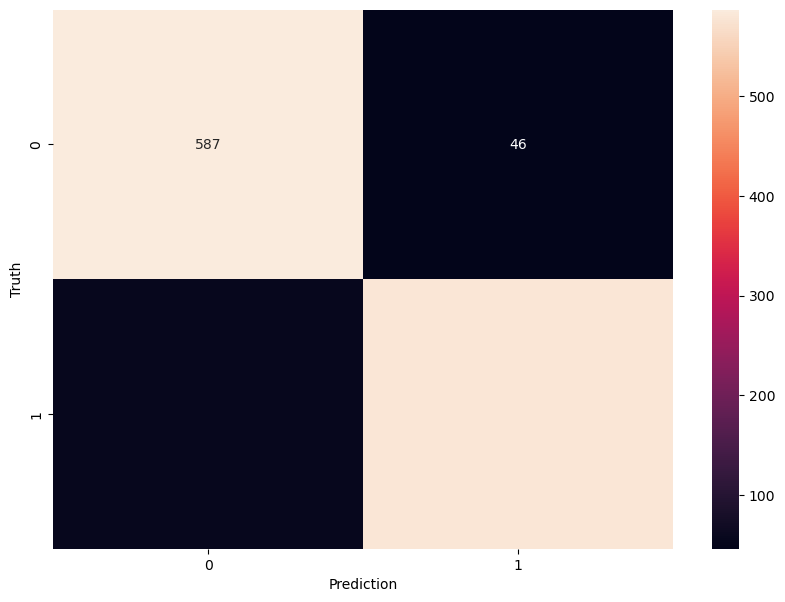

In [74]:
#finally print the confusion matrix for the best model (Tuning GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_best)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## Conclusion

In this text classification project, we explored three different approaches to model training: Multinomial Naive Bayes using TF-IDF vectorization, Gradient Boosting with TF-IDF vectorization, and Gradient Boosting with word embeddings. Each approach presented its own set of strengths and considerations.

1. **Multinomial Naive Bayes (TF-IDF Vectorization):**
   - Achieved an accuracy of ~84.8% before hyperparameter tuning and improved to ~89.3% after tuning.
   - Notable misclassification tendencies with a higher number of false positives.

2. **Gradient Boosting (TF-IDF Vectorization):**
   - Achieved an accuracy of ~88% before hyperparameter tuning and improved to ~90% after tuning.
   - Balanced precision and recall for both classes.

3. **Word Embedding-Based Gradient Boosting:**
   - Demonstrated an impressive accuracy of 90%, showcasing the effectiveness of word embeddings in capturing semantic relationships.

4. **Tuned Word Embedding-Based Gradient Boosting:**
   - Achieved the highest accuracy of 92% after hyperparameter tuning, outperforming all other models.
   - Balanced precision and recall for both classes, indicating robust performance.

### Recommendations for Model Improvement

To further enhance model performance:

- **Feature Engineering:** Experiment with additional text preprocessing techniques, such as stemming or handling special characters, to improve the quality of input features.

- **Ensemble Methods:** Explore ensemble methods like stacking or blending multiple models to leverage their individual strengths.

- **Advanced Embeddings:** Consider using more advanced word embeddings techniques, such as BERT embeddings, to capture richer semantic information in the text.

- **Increase Data Volume:** Augment the dataset with more labeled examples to provide the models with a broader understanding of the text patterns.

- **Deep Learning Approaches:** Explore deep learning architectures like recurrent neural networks (RNNs) or transformers (e.g., BERT) for text classification tasks. These models can capture intricate relationships within the text data.

These enhancements can contribute to building more robust and accurate text classification models for various applications.
